# Odkrywanie reguł asocjacyjnych

Będziemy korzystać z implementacji algorytmu Apriori w pakiecie `arules`. Składnia tworzenia zbioru reguł za pomocą funkcji `apriori()` jest następująca:

`apriori(data = mydata, parameter = list(support = 0.1, confidence = 0.8, minlen = 1))`

gdzie:
- `data` - macierz rozrzedzona z danymi transkacyjnymi
- `support` - określa minimalne wymagane wsparcie reguły. Domyślnym ustawieniem jest `support = 0.1`, co oznacza, że aby wygenerować regułę dla zbioru Groceries, artykuł musi pojawić się w przynajmniej $0.1 \cdot 9835 = 983.5$ transkacjach.
-  `confidence` - określa minimalną wymaganą ufność reguły
- `minlen` - określa minimalną wymaganą liczbę artykułów w regule

Funkcja zwraca obiekt reguł przechowujący wszystkie reguły, które spełniają kryteria minimalne.

Do ilustracji działania algorytmu użyjemy zbioru `Groceries` dostępnego w pakiecie `datasets`.

Dla zobrazowania, na wykresie umieszczono 20 najczęściej kupowanych produktów.

In [1]:
library(tidyverse)
options(jupyter.rich_display = FALSE,
        repr.plot.width = 15,
        repr.plot.height = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


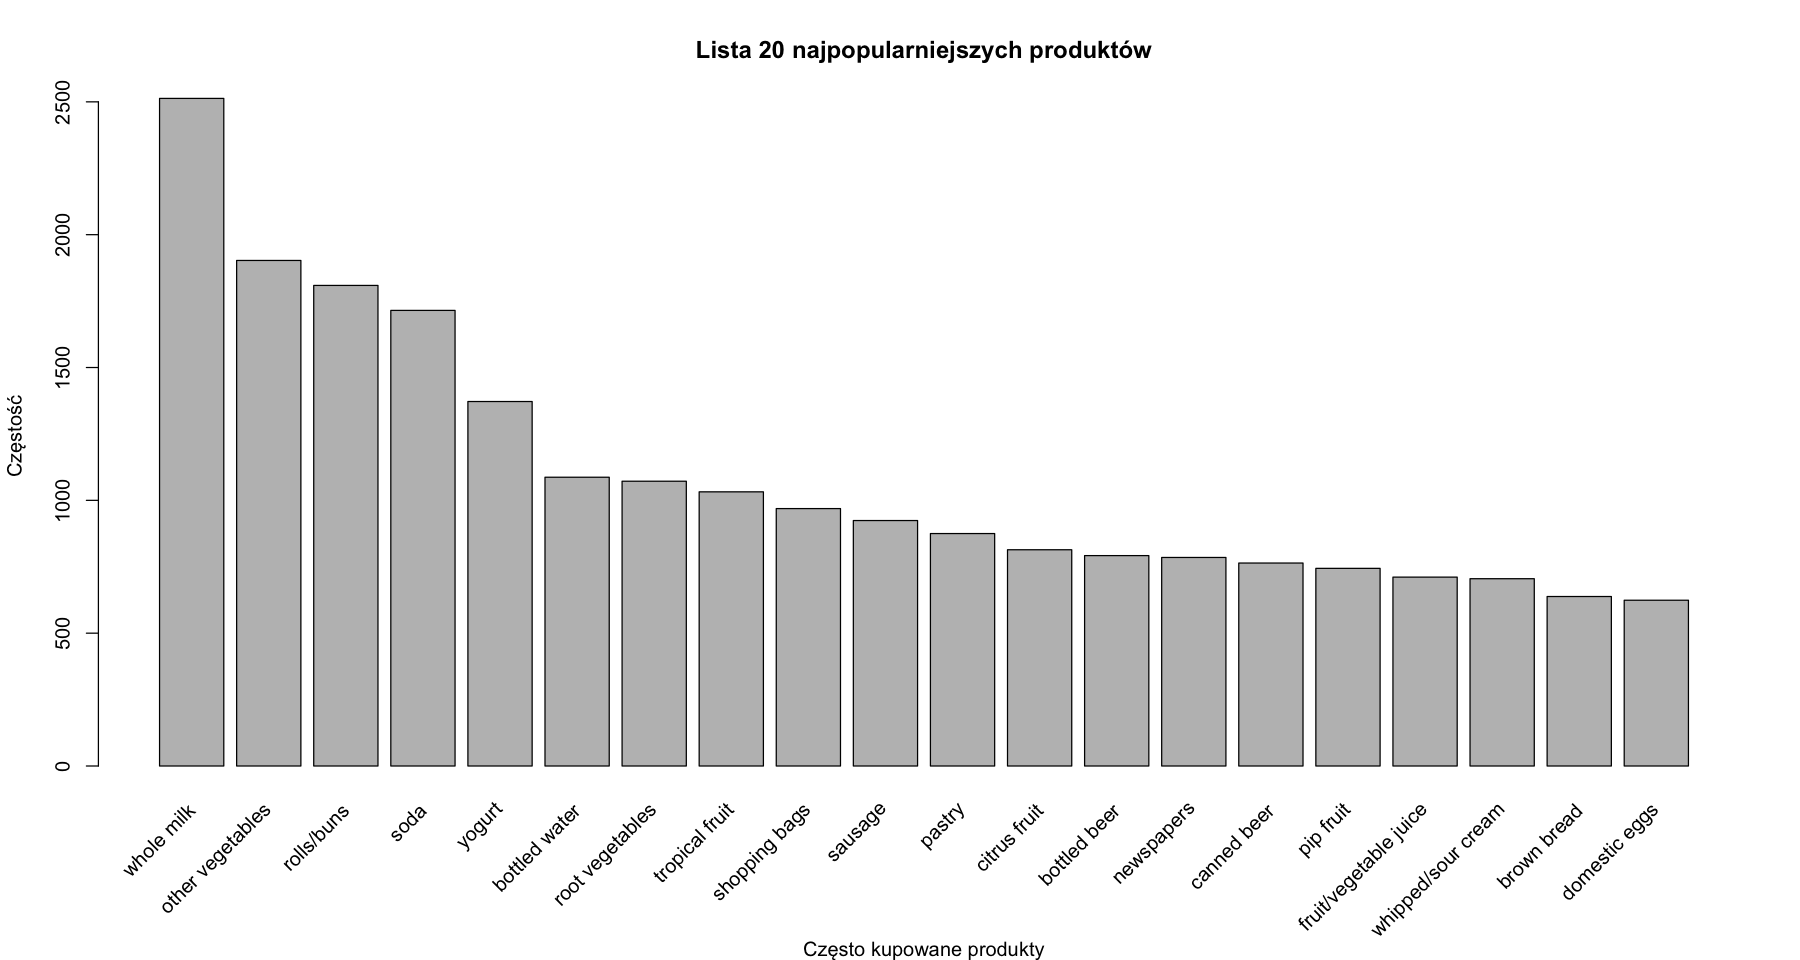

In [11]:
library(arules)

data("Groceries")
itemFrequencyPlot(Groceries, topN = 20, type = "absolute", xlab = "Często kupowane produkty", 
                  ylab = "Częstość", col = "Gray", 
                  main = "Lista 20 najpopularniejszych produktów")

In [15]:
class(Groceries)

[1] "transactions"
attr(,"package")
[1] "arules"

*nie mam pojecia co to za typ, ja jestem prostym czlowiekiem i umiem pracowac tylko na data frejmach*

In [16]:
str(Groceries)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:43367] 13 60 69 78 14 29 98 24 15 29 ...
  .. .. ..@ p       : int [1:9836] 0 4 7 8 12 16 21 22 27 28 ...
  .. .. ..@ Dim     : int [1:2] 169 9835
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	169 obs. of  3 variables:
  .. ..$ labels: chr [1:169] "frankfurter" "sausage" "liver loaf" "ham" ...
  .. ..$ level2: Factor w/ 55 levels "baby food","bags",..: 44 44 44 44 44 44 44 42 42 41 ...
  .. ..$ level1: Factor w/ 10 levels "canned food",..: 6 6 6 6 6 6 6 6 6 6 ...
  ..@ itemsetInfo:'data.frame':	0 obs. of  0 variables


*z tego komunikatu rozumiem ze za pomoca `@` i `$` dostane sie do jakis konkretnych "slotów" i itemkow*

In [19]:
class(Groceries@data)

[1] "ngCMatrix"
attr(,"package")
[1] "Matrix"

In [20]:
dim(Groceries@data)

[1]  169 9835

*o wow, strasznie duzo produktow, trzeba bedzie jakos to sensownie wyswietlic*

In [31]:
library(Matrix)

In [64]:
df <- as.data.frame(t(as.matrix(Groceries@data)))
colnames(df) <- Groceries@itemInfo$labels

In [66]:
dim(df)

[1] 9835  169

In [67]:
df[1:5, 1:5]

  frankfurter sausage liver loaf ham   meat 
1 FALSE       FALSE   FALSE      FALSE FALSE
2 FALSE       FALSE   FALSE      FALSE FALSE
3 FALSE       FALSE   FALSE      FALSE FALSE
4 FALSE       FALSE   FALSE      FALSE FALSE
5 FALSE       FALSE   FALSE      FALSE FALSE

*wiem ze to popisówa ale w sumie z tych zajec chcialbym poza poszerzona wiedza o Uczeniu Maszynowym wyniesc tez umiejetnosc bardziej zaawansowanej niz podstawowa obslugi R, tidyversa i ggplota*

                    item count
1             whole milk  2513
2       other vegetables  1903
3             rolls/buns  1809
4                   soda  1715
5                 yogurt  1372
6          bottled water  1087
7        root vegetables  1072
8         tropical fruit  1032
9          shopping bags   969
10               sausage   924
11                pastry   875
12          citrus fruit   814
13          bottled beer   792
14            newspapers   785
15           canned beer   764
16             pip fruit   744
17 fruit/vegetable juice   711
18    whipped/sour cream   705
19           brown bread   638
20         domestic eggs   624


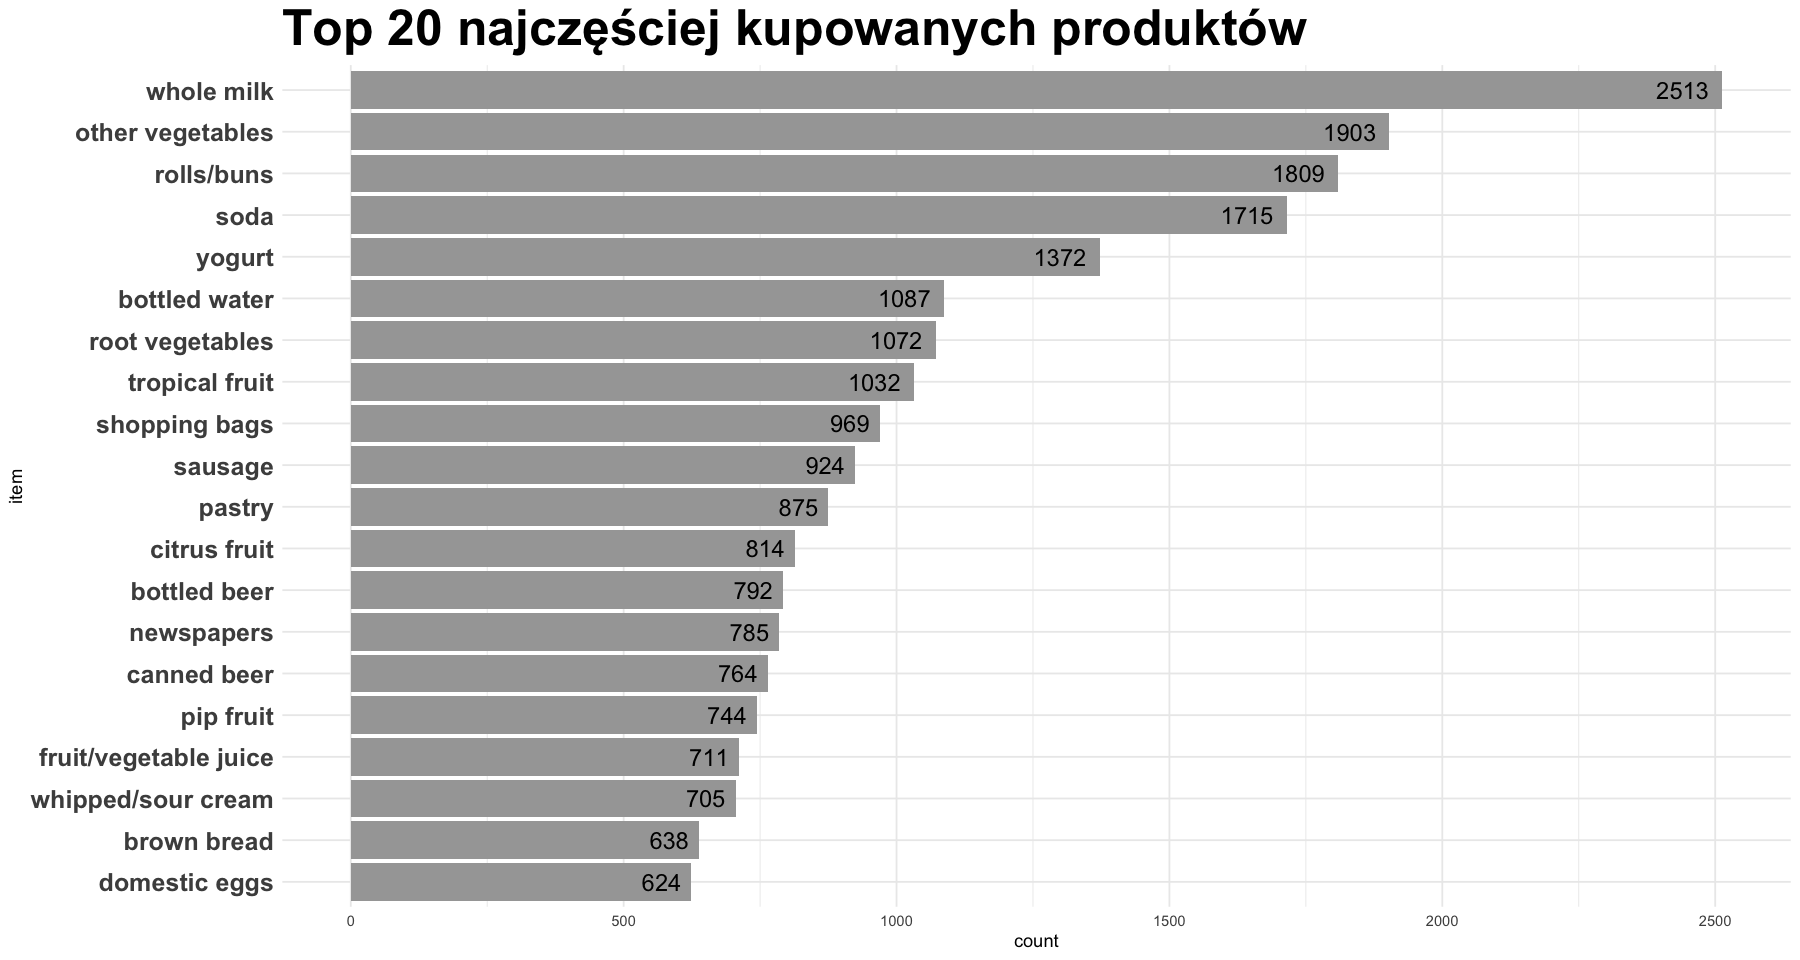

In [211]:
df %>% 
    colSums() %>%
    as.data.frame()  %>%
    setNames("count")  %>%
    tibble::rownames_to_column("item") %>%
    arrange(desc(count)) %>%
    head(20) %>%
    print()  %>%
    mutate(item = factor(item, levels = rev(item)))  %>% # zeby byly w kolejnosci slupki
    ggplot() + 
        aes(y = item, x = count) + 
        geom_col(fill = rgb(.65, .65, .65)) + 
        geom_text(aes(label = count), hjust=1.25, size = 5) +
        theme_minimal() + 
        ggtitle("Top 20 najczęściej kupowanych produktów") + 
        theme(axis.text.y = element_text(face = "bold", size = 15), 
              plot.title = element_text(face = "bold", size = 30),
              plot.title.position = "panel")

*no nie wiem, wyszlo cos takiego, dlugo mozna by to dlubac i sie bawic*

## Zadania

1. Utwórz zbiór reguł dla zbioru `Groceries`. Wsparcie ustaw na podstawie najmniejszej liczby transakcji wymaganej do tego, aby uznać wzorzec za interesujący, czyli np artykuły kupowane dwa razy dziennie (czyli 60 razy w danych z miesiąca), zatem wsparcie = 60/9835. Pozostałe wartości parametrów: ufność = 0.25 (reguła jest dołączana do wyników wtedy, kiedy działa w min 25% przypadków), minimalna liczba wymaganych artykułów = 2 (eliminujemy reguły zawierające mniej niż 2 elementy).

In [215]:
myrules <- arules::apriori(Groceries,
                           parameter = list(supp = 60/9834, conf = 0.25, target = "rules", minlen = 2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
       0.25    0.1    1 none FALSE            TRUE       5 0.006101281      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 60 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.00s].
sorting and recoding items ... [108 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [446 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


Aby sprawdzić do czego służą parametry wymienione w pierwszych wierszach wyników, wpisz w konsoli polecenie `?APparameter`.

2. Wyświetl ogólny przegląd reguł asocjacyjnych za pomocą funkcji `summary()`. Rozmiar reguły obliczany jest jako suma lewej (`lhs`) i prawej (`rhs`) strony reguły.

Miary `count` (liczebności) oraz `coverage` (pokrycia) są blisko związane ze wsparciem i ufnością. Liczebność jest licznikiem miary wsparcia (liczba transakcji, które zawierały artykuł). Miara pokrycia reguły asocjacji jest wsparciem lewej strony reguły (pokrycie to szansa, że reguła dotyczy dowolnej, losowo wybranej transakcji w zbiorze danych). Miara `lift` (dźwignia) reguły określa, o ile bardziej prawdopodobny jest zakup artykułu lub zbioru artykułów w stosunku do jego typowego wskaźnika kupna, jeśli wiadomo, że kupiony został inny artykuł lub zbiór artykułów.

3. Wyświetl pierwsze pięć reguł za pomocą funkcji `inspect()`.

Odczytaj i opisz w komentarzu pierwszą regułę.

## Sortowanie zbioru reguł asocjacyjnych

W zależności od celów analizy koszyka, najużyteczniejszymi regułami mogą być te, które mają najwyższe wsparcie, ufność lub dźwignię. Kolejność reguł możemy zmienić, stosując pakiet `arules` w połączneniu z funkcją `sort()`.

*Zadanie*
4. Wyświetl pięć reguł najlepszych pod względem dźwigni i wypisz wnioski.

## Podzbiory reguł asocjacyjnych
Do wyszukiwania podzbiorów transakcji, artykułów lub reguł służy funkcja `subset()`.

*Zadanie*
5. Znajdź reguły, w których występują owoce jagodowe i zapisz w obiekcie `berryrules`. Następnie zbadaj te reguły (funkcja `inspect()`) i wypisz wnioski 